<a href="https://colab.research.google.com/github/kiing-dom/CS4287/blob/main/Assignment2CNN/CS4287_Assign2_20243561_20250762.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CS4287 CNN**

In [107]:
# 20243561 - Dominion Gbadamosi  --- 20250762 - Dennis Kolomiyets
# Runs

In [108]:
#Importing Necessary Libraries
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf
import random
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Data Visualization



In [109]:
# using pandas to read the library
dataset = "all_letters_info.csv"
df = pd.read_csv(dataset)

#display the header of the dataset
display(df.head())

,letter,label,file,background
0,а,1,01_01.png,0
1,а,1,01_02.png,0
2,а,1,01_03.png,0
3,а,1,01_04.png,0
4,а,1,01_05.png,0


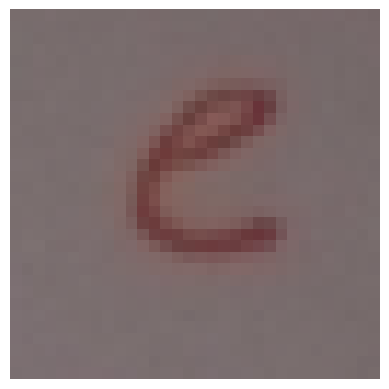

In [110]:
#folder path where the images are stored
images_folder = "all_letters_image/all_letters_image/"

#get list of all image files in the folder
image_files = [f for f in os.listdir(images_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]

#choose a random image
random_image_file = random.choice(image_files)

#create the full path to the random image
random_image_path = os.path.join(images_folder, random_image_file)

#load and display the random image
img = mpimg.imread(random_image_path)

plt.imshow(img)
plt.axis('off')
plt.show()

In [111]:
labels = df['label'] #corresponding to the "label" column in the csv file
file_names = df['file'] #corresponds to the "file" column in the csv file

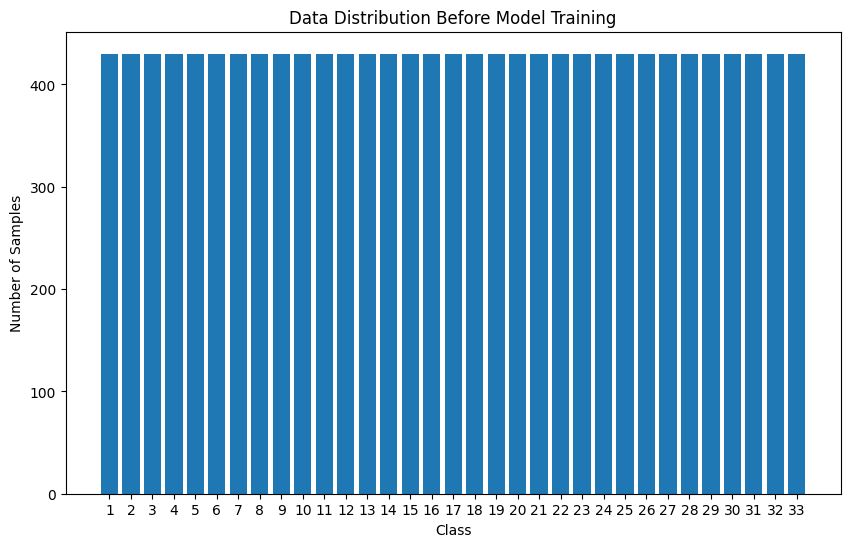

Class 1: 430 samples
Class 2: 430 samples
Class 3: 430 samples
Class 4: 430 samples
Class 5: 430 samples
Class 6: 430 samples
Class 7: 430 samples
Class 8: 430 samples
Class 9: 430 samples
Class 10: 430 samples
Class 11: 430 samples
Class 12: 430 samples
Class 13: 430 samples
Class 14: 430 samples
Class 15: 430 samples
Class 16: 430 samples
Class 17: 430 samples
Class 18: 430 samples
Class 19: 430 samples
Class 20: 430 samples
Class 21: 430 samples
Class 22: 430 samples
Class 23: 430 samples
Class 24: 430 samples
Class 25: 430 samples
Class 26: 430 samples
Class 27: 430 samples
Class 28: 430 samples
Class 29: 430 samples
Class 30: 430 samples
Class 31: 430 samples
Class 32: 430 samples
Class 33: 430 samples


In [126]:
y_train = df['label']

# Assuming class_labels is a list of class names
class_labels = sorted(y_train.unique())  # Assuming labels are integers

# Count the number of samples for each class
class_counts = y_train.value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(class_labels, class_counts[class_labels], tick_label=class_labels)
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Data Distribution Before Model Training')
plt.show()

# Print the exact counts
for label in class_labels:
    count = class_counts[label] if label in class_counts else 0
    print(f"Class {label}: {count} samples")

## Data Preprocessing

In [112]:
# Preprocessing data
le = LabelEncoder()
labels = le.fit_transform(labels)

#Image Preprocessing
images = []

for file_name in file_names:
  # create the full file path
  file_path = os.path.join(images_folder, file_name)

  # load and preprocess the image
  img = tf.keras.preprocessing.image.load_img(file_path, target_size=(32,32))
  img = tf.keras.preprocessing.image.img_to_array(img)
  img = img / 255.0 #Normalization of pixel values to the range [0, 1] to make values more suitable for neural network
  images.append(img)

images = np.array(images)

#splitting the dataset into training & test data
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Adjust num_classes based on the actual number of classes
y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes=33)
y_train_one_hot = tf.keras.utils.to_categorical(y_train, num_classes=33)  # Adjust num_classes based on the actual number of classes



## Creating the Model

In [113]:
# Creating A Sequential Model
model = tf.keras.models.Sequential()

# adding a convolutional layer with 32 filters, a 3x3 kernel, and ReLU activation
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape = (32, 32, 3)))

#adding a MaxPooling layer to downsample the spatial dimensions
model.add(tf.keras.layers.MaxPooling2D(2, 2))

#adding a convolutional layer with 64 filters and a 3x3 kernel
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))

#adding another MaxPooling layer
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

#flatten the output before deeding it into the dense layers
model.add(tf.keras.layers.Flatten())

#adding a Dense layer with 64 units and ReLU activation
model.add(tf.keras.layers.Dense(64, activation='relu'))

#adding the output layer with as many units as there are classes and softmax
# activation for multiclass classificaiton
model.add(tf.keras.layers.Dense(33, activation='softmax'))  # Assuming there are 33 classes (letters in cyrillic alphabet)

# Compiling the model but including the top 5 accuracy metric
top5_acc = tf.keras.metrics.TopKCategoricalAccuracy(k=5)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', top5_acc])

#display summary of the model
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_12 (Flatten)        (None, 2304)              0         
                                                                 
 dense_24 (Dense)            (None, 64)              

## Training

In [114]:
# Assuming X_train_resized and y_train_one_hot are your training data
# Adjust batch_size and epochs as needed
batch_size = 32
epochs = 50

# Train the model
history = model.fit(X_train, y_train_one_hot, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/50
284/284 [==============================] - 14s 46ms/step - loss: 3.4649 - accuracy: 0.0412 - top_k_categorical_accuracy: 0.1965 - val_loss: 3.3794 - val_accuracy: 0.0572 - val_top_k_categorical_accuracy: 0.2598
Epoch 2/50
284/284 [==============================] - 13s 44ms/step - loss: 3.1283 - accuracy: 0.1248 - top_k_categorical_accuracy: 0.4090 - val_loss: 2.6637 - val_accuracy: 0.2550 - val_top_k_categorical_accuracy: 0.6143
Epoch 3/50
284/284 [==============================] - 16s 57ms/step - loss: 2.4755 - accuracy: 0.3016 - top_k_categorical_accuracy: 0.6704 - val_loss: 2.2796 - val_accuracy: 0.3364 - val_top_k_categorical_accuracy: 0.7226
Epoch 4/50
284/284 [==============================] - 12s 41ms/step - loss: 2.1382 - accuracy: 0.3914 - top_k_categorical_accuracy: 0.7462 - val_loss: 2.1132 - val_accuracy: 0.3945 - val_top_k_categorical_accuracy: 0.7547
Epoch 5/50
284/284 [==============================] - 13s 46ms/step - loss: 1.9209 - accuracy: 0.4588 - top_k_ca

## Evaluation

89/89 [==============================] - 2s 19ms/step


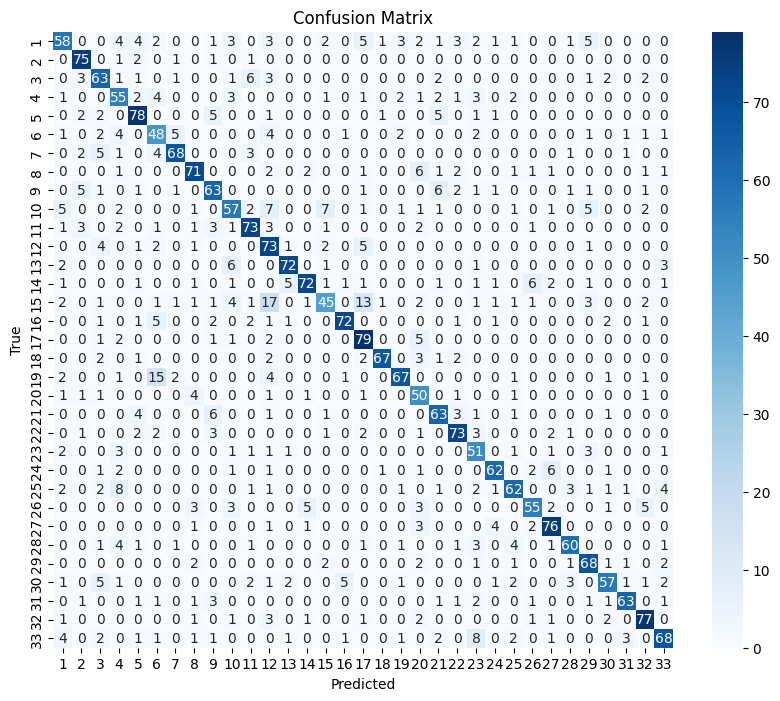

              precision    recall  f1-score   support

           0       0.69      0.57      0.62       102
           1       0.81      0.93      0.86        81
           2       0.67      0.73      0.70        86
           3       0.60      0.71      0.65        78
           4       0.77      0.81      0.79        96
           5       0.56      0.66      0.60        73
           6       0.85      0.80      0.82        85
           7       0.80      0.78      0.79        91
           8       0.70      0.74      0.72        85
           9       0.69      0.61      0.64        94
          10       0.78      0.79      0.79        92
          11       0.55      0.81      0.66        90
          12       0.87      0.85      0.86        85
          13       0.87      0.74      0.80        97
          14       0.70      0.45      0.55       100
          15       0.89      0.80      0.84        90
          16       0.69      0.87      0.77        91
          17       0.94    

In [119]:
# Evaluate the model with top 5 accuracy
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_one_hot, axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
class_labels = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10",
                "11", "12", "13", "14", "15", "16", "17", "18", "19", "20",
                "21", "22", "23", "24", "25", "26", "27", "28", "29", "30",
                "31", "32", "33"]


# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
class_report = classification_report(y_true_classes, y_pred_classes)
print(class_report)

## Sample Images

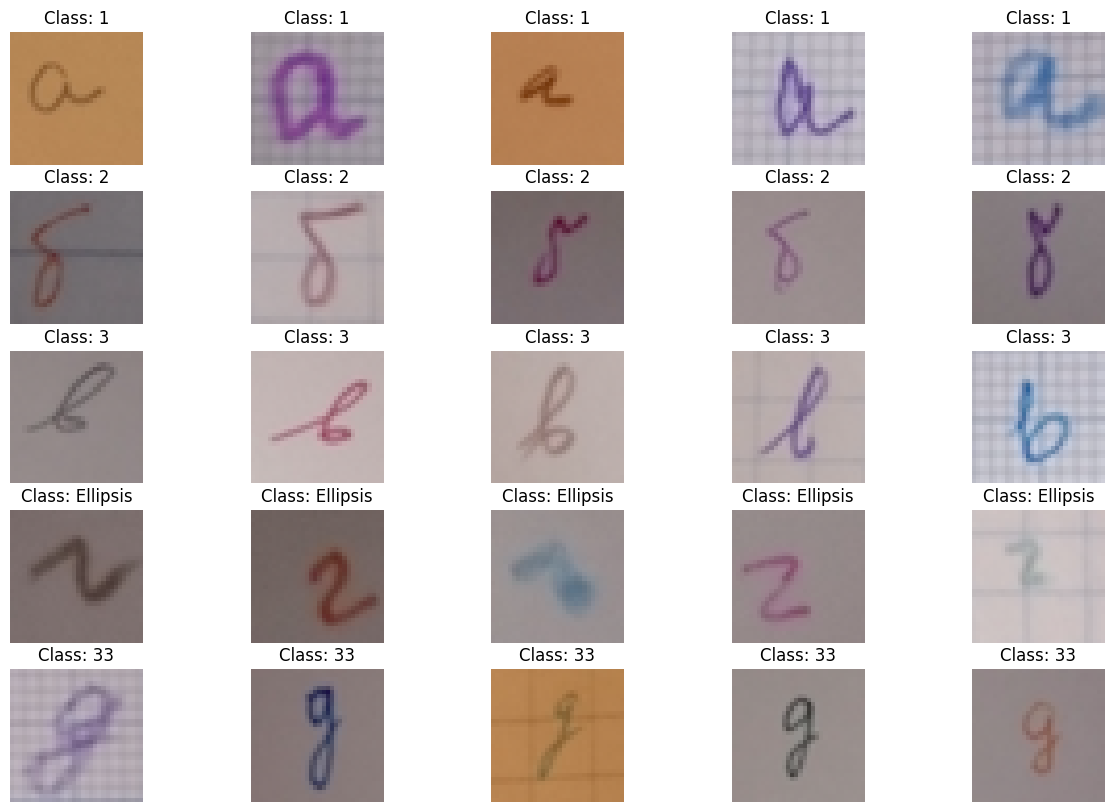

In [117]:
# Function to display sample images from different classes
def display_sample_images(X, y, class_labels, num_samples=5):
    plt.figure(figsize=(15, 10))

    for i, class_label in enumerate(class_labels):
        # Find the indices of samples for the current class
        class_indices = np.where(y == i)[0]

        # Take a random sample from the current class
        random_sample_indices = np.random.choice(class_indices, size=num_samples, replace=False)

        for j, sample_index in enumerate(random_sample_indices):
            plt.subplot(len(class_labels), num_samples, i * num_samples + j + 1)
            plt.imshow(X[sample_index])
            plt.title(f'Class: {class_label}')
            plt.axis('off')

    plt.show()

# Display sample images
display_sample_images(X_train, y_train, class_labels, num_samples=5)